<a href="https://colab.research.google.com/github/AkashRathod25/Deep-Learning-6-July/blob/main/4_Multiclass_Classification_(14_7_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.Multiclass classification with Keras
Number of classes is more than 2 then it is a multiclass classification problem

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# 1.Load Data


In [4]:
import pandas as pd
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_train.csv"
df = pd.read_csv(url1)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# 2.Perform basic Data Quality Check



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [9]:
df.duplicated().sum()

0

In [12]:
df['price_range'].unique()

array([1, 2, 3, 0])

### 4 classes to predict in above dataframe

Price range

1. 0 - Cheap
2. 1 - Moderate
3. 2 - High
4. 3 - Very Expensive

# 3.Seperate X (Feature Variable) and Y (Target Variable)


In [14]:
x = df.drop(columns = ['price_range'])
y = df['price_range']

In [17]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [18]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


# Step 4: Perform preprocessing on X

In [19]:
x.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,int64
four_g,int64
int_memory,int64
m_dep,float64
mobile_wt,int64
n_cores,int64


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [22]:
num_pipe = Pipeline(steps=[('impute' , SimpleImputer(strategy='median')) ,
                           ('scaler' , StandardScaler())]).set_output(transform='pandas')

In [23]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [24]:
# Fit Transform

x_pre = num_pipe.fit_transform(x)

x_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [25]:
x.shape

(2000, 20)

# Step 5: Apply train test split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain , xtest , ytrain , ytest = train_test_split(x_pre , y , test_size=0.2  , random_state=42)

In [28]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [29]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [30]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
353,-0.128653,-0.990050,-1.253064,-1.019184,0.619880,0.957886,-1.325520,-0.006069,-0.063548,1.521249,1.003414,-0.834197,-0.614489,0.404613,1.589078,2.579151,1.462493,0.559641,-1.006018,-1.014099
1333,1.669628,-0.990050,1.688833,-1.019184,1.080671,-1.043966,-0.994781,-0.352878,1.575296,1.084046,1.333295,-0.793626,-0.693176,-0.745267,-1.022389,-1.094526,-0.551204,0.559641,0.994018,-1.014099
905,-0.567980,1.010051,0.585621,-1.019184,-0.071307,-1.043966,-0.829411,-1.046495,0.727618,-0.664768,1.498235,-0.877022,0.329755,1.630107,1.351672,0.283103,1.462493,0.559641,0.994018,-1.014099
1289,-1.419319,1.010051,-1.253064,0.981177,0.619880,-1.043966,1.430640,-0.006069,-0.289595,0.209639,-0.316108,0.847234,1.635035,-0.201218,0.402047,-0.176107,-1.100394,0.559641,-1.006018,-1.014099


In [31]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [32]:
xtrain.shape


(1600, 20)

In [33]:
xtest.shape

(400, 20)

## **This is applicable to multiclass classification only, get onehot encoding for target features**

In [35]:
from keras.utils import to_categorical

In [36]:
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

**Numbering of Rows**
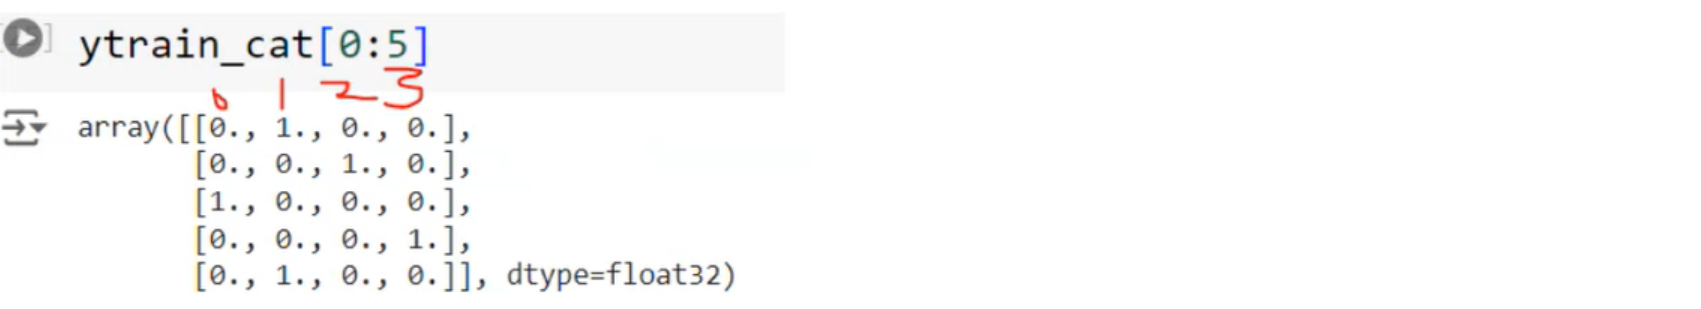

In [39]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [40]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [41]:
ytest_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [43]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [44]:
ytrain_cat.shape[1]

4

# Step 6: Build the neural network

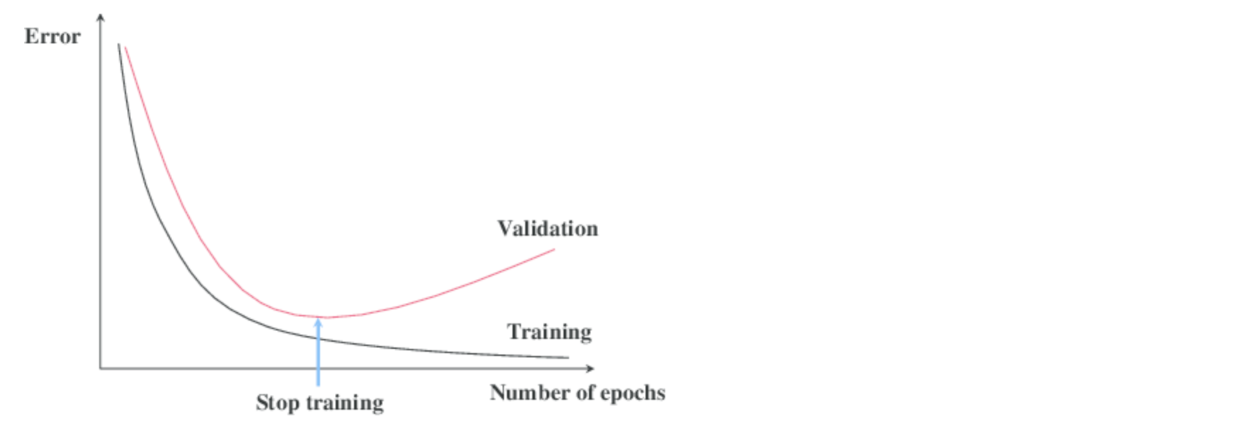

In [46]:
xtrain.shape[0]  # 0 for No of Rows

1600

In [50]:
xtrain.shape[1]  # 1 for No of Columns

20

In [52]:
from keras.models import Sequential
from keras.layers import Input , Dense , Dropout
from keras.callbacks import EarlyStopping

In [57]:
# Initialize Model
model = Sequential()

# Create Input Layer
model.add(Input(shape=(xtrain.shape[1],)))

# Create Dense Layer 1
model.add(Dense(64 , activation='relu'))
# Add Dropout Layer
model.add(Dropout(0.2))

# Create Dense Layer 2
model.add(Dense(32 , activation='relu'))
# Add Dropout Layer
model.add(Dropout(0.1))

# Create Output Layer
model.add(Dense (ytrain_cat.shape[1] , activation='softmax'))

In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Complie the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy' ,
              metrics=['accuracy'])

In [63]:
# Add early stopping
# Patience Should be less than 20

es = EarlyStopping(monitor='val_loss' , patience=15)


In [64]:
hist = model.fit(xtrain , ytrain_cat , validation_split=0.2 , epochs=200 , callbacks=[es])

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2754 - loss: 1.4332 - val_accuracy: 0.4094 - val_loss: 1.2668
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4318 - loss: 1.2291 - val_accuracy: 0.5063 - val_loss: 1.1237
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5505 - loss: 1.0428 - val_accuracy: 0.6187 - val_loss: 0.9516
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6059 - loss: 0.9049 - val_accuracy: 0.6719 - val_loss: 0.7937
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6788 - loss: 0.7653 - val_accuracy: 0.7563 - val_loss: 0.6664
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7454 - loss: 0.6396 - val_accuracy: 0.8000 - val_loss: 0.5734
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7770 - loss: 0.5551 - val_accuracy: 0.8438 - val_loss: 0.4973
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8229 - loss: 0.4898 - val_accuracy: 0.8469 - v

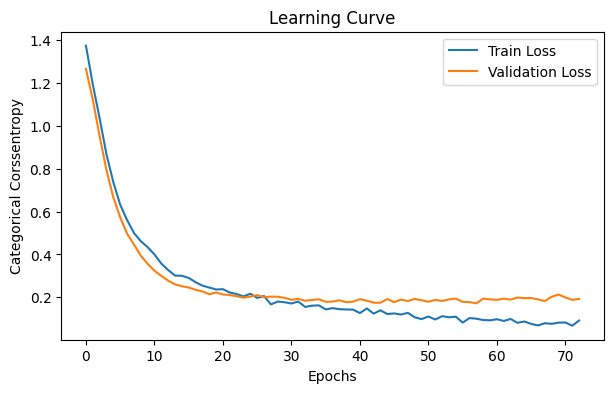

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(hist.history['loss'] , label='Train Loss')
plt.plot(hist.history['val_loss'] , label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Corssentropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### 6.1.Model Evalatuation


In [69]:
model.evaluate(xtrain , ytrain_cat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9964 - loss: 0.0245


[0.05527680367231369, 0.9862499833106995]

In [66]:
model.evaluate(xtest , ytest_cat)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9388 - loss: 0.1710  


[0.19181059300899506, 0.925000011920929]

# 7.Predict the results for train and test

In [70]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [71]:
yprob_train[0:5]

array([[1.31449515e-05, 9.32588458e-01, 6.73983991e-02, 1.39929197e-08],
       [1.91216240e-20, 4.97092811e-09, 9.89377677e-01, 1.06222397e-02],
       [8.31977606e-01, 1.68022186e-01, 2.30913955e-07, 3.10980076e-22],
       [7.56240718e-24, 2.49586295e-13, 1.63435768e-02, 9.83656347e-01],
       [1.41757424e-04, 9.96369004e-01, 3.48934135e-03, 5.75198986e-11]],
      dtype=float32)

In [73]:
yprob_test[0:5]

array([[9.4830877e-01, 5.1691264e-02, 6.7037009e-10, 1.7933747e-27],
       [1.4909311e-12, 2.8505648e-04, 9.9971437e-01, 6.4194336e-07],
       [1.0619739e-03, 9.9876261e-01, 1.7536269e-04, 3.1240994e-16],
       [1.4952488e-30, 3.4995060e-17, 4.0973112e-04, 9.9959034e-01],
       [1.9524781e-04, 9.9757934e-01, 2.2253422e-03, 2.8779431e-12]],
      dtype=float32)

In [78]:
import numpy as np

ypred_train = np.argmax(yprob_train , axis=1)
ypred_test = np.argmax(yprob_test , axis=1)

In [79]:
ypred_train[0:5]

array([1, 2, 0, 3, 1])

In [80]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [81]:
ypred_test[0:5]

array([0, 2, 1, 3, 1])

In [82]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


# 8.Confision Matrix


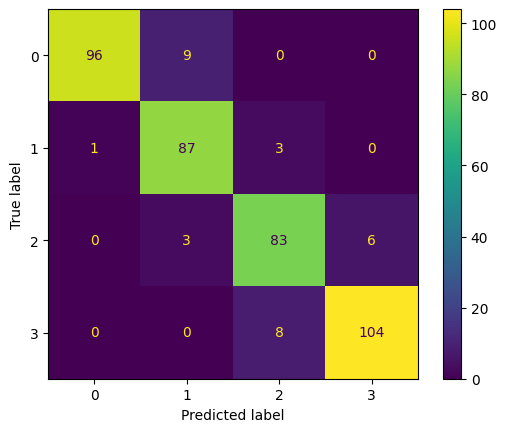

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [87]:
# f1-macro is more than 0.8 hence model is a good model

from sklearn.metrics import classification_report
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       105
           1       0.88      0.96      0.92        91
           2       0.88      0.90      0.89        92
           3       0.95      0.93      0.94       112

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.93      0.93      0.93       400



# 9.Out of sample predictions

In [85]:
url2 = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_test.csv'
df2 = pd.read_csv(url2)
df2

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [88]:
x2 = df2.drop(columns=['id'])
x2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [90]:
x2_pre = num_pipe.fit_transform(x2)

x2_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,-0.580671,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,0.293833,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,-0.580671,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,1.605590,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,0.731085,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097


In [91]:
probs = model.predict(x2_pre)
probs[0:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.8815207e-23, 4.0039660e-12, 2.5842595e-01, 7.4157405e-01],
       [2.7763330e-29, 2.4250538e-15, 3.1223185e-03, 9.9687773e-01],
       [6.6649968e-16, 5.6685730e-07, 9.8696733e-01, 1.3032063e-02],
       [1.7281019e-38, 8.4066970e-22, 7.5338644e-06, 9.9999243e-01],
       [6.7335909e-04, 9.9707681e-01, 2.2497550e-03, 5.9592153e-12]],
      dtype=float32)

In [92]:
preds = np.argmax(probs , axis=1)
preds[0:5]

array([3, 3, 2, 3, 1])

In [93]:
max_probs = np.argmax(probs , axis=1)

max_probs[0:5]

array([3, 3, 2, 3, 1])

In [96]:
df_final = df2[['id']]
df_final['price_range_pred'] = preds
df_final['probability'] = max_probs

df_final[0:5]

,id,price_range_pred,probability
0,1,3,3
1,2,3,3
2,3,2,2
3,4,3,3
4,5,1,1


In [98]:
df_final['price_range_pred'].value_counts()

,count
price_range_pred,
2,261
3,256
1,246
0,237


<Axes: xlabel='price_range_pred'>

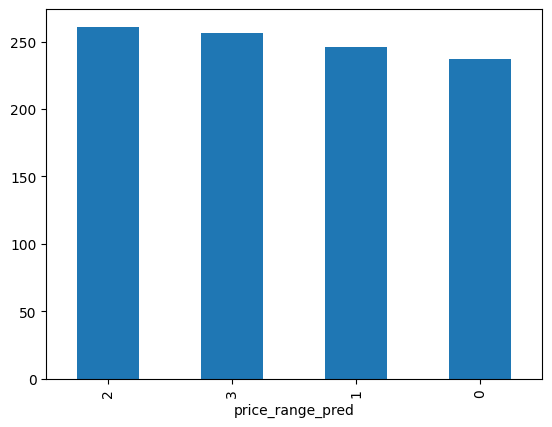

In [99]:
df_final['price_range_pred'].value_counts().plot(kind='bar')

In [100]:
df_final.to_csv('ResultMobile.csv' , index=False)